In [15]:
import numpy as np
import matplotlib.pyplot as plt
from MyRVNS_class import MyRVNS
import MyProblem_class
import copy

myRVNS = MyRVNS()
myProblem = MyProblem_class.MyProblem(10)

TypeError: MyProblem() takes no arguments

In [13]:
n = 10
probdata = myProblem.probdef(10)

print(probdata.c)

[[83 49 75 17 99 26 59 27 67 47]
 [55 78 75 74 76 53  3 33 20 22]
 [20 12 87 76  2 19 25 29 12 41]
 [77 59 23 35 53  6 52 89 86 50]
 [25 46 72  8  7 80 87 39 84 11]
 [25 23 62 63 37 95 20  6  1 86]
 [48 90 46 42  3 82 29 60 73 38]
 [14 48  6 60 26 66 17 27 72 60]
 [27 54 37 23 98 68 58 51 36 21]
 [49 37 61 63  5 92  7 62 84 44]]


Dados gerados - problema definido. Agora é chamar os solvers.

In [70]:
# Contador do número de soluções candidatas avaliadas
num_sol_avaliadas = 0

# Máximo número de soluções candidatas avaliadas
max_num_sol_avaliadas = 10000

# Número de estruturas de vizinhanças definidas
kmax = 3

'''
Implementa uma solução inicial para o problema
'''
def sol_inicial(probdata,apply_constructive_heuristic):
    
    '''  
    Modelou-se uma solução x como a sequência de tarefas atribuídas, respectivamente, aos agentes a1, a2, ... ai, ..., an
    
         a1 a2 ... an
    x = [t7 t3 ... t9]
    '''
    
    if apply_constructive_heuristic == False:        
        # Constrói solução inicial aleatoriamente
        x = Struct()
        x.solution = list(np.random.permutation(probdata.n))
    
    else:
        # Constrói solução inicial usando uma heurística construtiva
        x = Struct()
        x.solution = []
        job = np.argsort(probdata.c.var(axis=0))    # tarefas ordenadas de acordo com a variância dos custos
        for tarefa in job[::-1]:        
            agent = np.argmin(probdata.c[:,tarefa]) # atribui as tarefas em ordem decrescente de variância ao agente de menor custo
            x.solution.insert(agent,tarefa)
        
    return x

# Gera solução inicial
x = sol_inicial(probdata,apply_constructive_heuristic=False)

print(x.solution)

[np.int32(0), np.int32(2), np.int32(7), np.int32(5), np.int32(4), np.int32(8), np.int32(1), np.int32(6), np.int32(3), np.int32(9)]


Temos a solução inicial (gerada aleatoriamente).

In [71]:
'''
Implementa a função objetivo do problema
'''
def fobj(x, probdata):
    
    '''
         a1 a2 ... an
    x = [t7 t3 ... t9]
    '''
    
    fitness = 0.0
    for i in np.arange(0,probdata.n,1):
        fitness += probdata.c[i,x.solution[i]]
    
    x.fitness = fitness
    return x

# Avalia solução inicial
x = fobj(x,probdata)
print(x.solution)
print(x.fitness)
num_sol_avaliadas += 1

[np.int32(0), np.int32(2), np.int32(7), np.int32(5), np.int32(4), np.int32(8), np.int32(1), np.int32(6), np.int32(3), np.int32(9)]
375.0



--- SOLUÇÃO INICIAL CONSTRUÍDA ---

Sequência de tarefas atribuídas aos agentes:

x = [np.int32(0), np.int32(2), np.int32(7), np.int32(5), np.int32(4), np.int32(8), np.int32(1), np.int32(6), np.int32(3), np.int32(9)]

fitness(x) = 375.0


--- MELHOR SOLUÇÃO ENCONTRADA ---

Sequência de tarefas atribuídas aos agentes:

x = [np.int32(3), np.int32(8), np.int32(1), np.int32(5), np.int32(9), np.int32(7), np.int32(4), np.int32(2), np.int32(0), np.int32(6)]

fitness(x) = 115.0



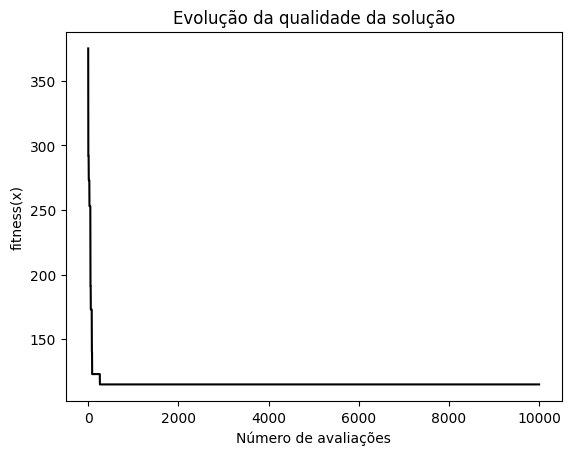

In [72]:
'''
Implementa a função shake
'''
def shake(x, k, probdata):
        
    y = copy.deepcopy(x)
    r = np.random.permutation(probdata.n)
    
    if k == 1:             # exchange two random positions
        y.solution[r[0]] = x.solution[r[1]]
        y.solution[r[1]] = x.solution[r[0]]        
    elif k == 2:           # exchange three random positions
        y.solution[r[0]] = x.solution[r[1]]
        y.solution[r[1]] = x.solution[r[2]]
        y.solution[r[2]] = x.solution[r[0]]
    elif k == 3:           # shift positions     
        z = y.solution.pop(r[0])
        y.solution.insert(r[1],z)
    
    return y

'''
Implementa a função neighborhoodChange
'''
def neighborhoodChange(x, y, k):
    
    if y.fitness < x.fitness:
        x = copy.deepcopy(y)
        k = 1
    else:
        k += 1
        
    return x, k


# Armazena dados para plot
historico = Struct()
historico.sol = []
historico.fit = []
historico.sol.append(x.solution)
historico.fit.append(x.fitness)

# Ciclo iterativo do método
while num_sol_avaliadas < max_num_sol_avaliadas:
    
    k = 1
    while k <= kmax:
        
        # Gera uma solução candidata na k-ésima vizinhança de x        
        y = shake(x,k,probdata)
        y = fobj(y,probdata)
        num_sol_avaliadas += 1
        
        # Atualiza solução corrente e estrutura de vizinhança (se necessário)
        x,k = neighborhoodChange(x,y,k)

        # Armazena dados para plot
        historico.sol.append(x.solution)
        historico.fit.append(x.fitness)
        

print('\n--- SOLUÇÃO INICIAL CONSTRUÍDA ---\n')
print('Sequência de tarefas atribuídas aos agentes:\n')
print('x = {}\n'.format(historico.sol[0]))
print('fitness(x) = {:.1f}\n'.format(historico.fit[0]))

print('\n--- MELHOR SOLUÇÃO ENCONTRADA ---\n')
print('Sequência de tarefas atribuídas aos agentes:\n')
print('x = {}\n'.format(x.solution))
print('fitness(x) = {:.1f}\n'.format(x.fitness))

plt.figure()
s = len(historico.fit)
plt.plot(np.linspace(0,s-1,s),historico.fit,'k-')
plt.title('Evolução da qualidade da solução');
plt.xlabel('Número de avaliações');
plt.ylabel('fitness(x)');
plt.show()